To install these, run `pip install numpy, sklearn, matplotlib`

In [2]:
import sklearn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = datasets.load_digits()

In [4]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
len(data['target']) # this is how many examples we have

1797

In [6]:
image_data = data['data']
labels = data['target']

# Preprocessing

In [7]:
# images are 8x8 flattened into 64
image_data.shape, labels.shape

((1797, 64), (1797,))

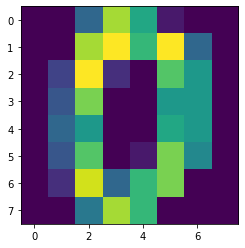

In [11]:
# how to see images
im_demo = image_data[0].reshape(8,8)
plt.imshow(im_demo)

In [12]:
labels[0] # as you can see, this is marked as a 0

0

In [9]:
im_demo # what the array looks like in number form. 8x8 is easy to see, but large images it's hard to understand

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

By the example I showed at our meeting, we want anything with a non-zero intensity to be marked as a 1. Let's do that with this simple syntax!

In [14]:
im_demo = (im_demo > 0).astype(int)

In [15]:
im_demo # woaaah, kinda cool right. and a one-liner :)

array([[0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0]])

In [16]:
# apply this technique to all images
image_data = (image_data > 0).astype(int)

In [17]:
image_data # note this is a nested array, so each index is it's own image (flattened)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 0]])

# Train/Test Split
In machine learning, we make training datasets to train the data and testing datasets to test the model. This prevents what's called `overfitting`, where you over-train on the training data and you make models that don't generalize to the real world data. In this case, we are going to randomly choose 80% of the data to train on, and "hold out" 20% for testing.

In [18]:
n_train = int(0.8*len(image_data)); n_train

1437

In [38]:
train_indices = np.random.choice(np.arange(len(labels)), n_train, replace=False); train_indices

array([1635,  603, 1184, ..., 1068, 1513,  612])

In [39]:
train_images = image_data[train_indices]
train_labels = labels[train_indices]

test_images = np.delete(image_data, train_indices, axis=0) # this grabs everything NOT in the train indices
test_labels = np.delete(labels, train_indices, axis=0)

In [40]:
train_images.shape, test_images.shape

((1437, 64), (360, 64))

In [41]:
train_labels.shape, test_labels.shape

((1437,), (360,))

Now we are ready to do Naive Bayes

# Naives Bayes

In [81]:
# index x grabs the array of length 64 where each index y is p(pixel_at_y | x)
label_to_distribution = np.zeros((10,64))
# probability of each 
p_labels = np.zeros(10)

In [82]:
# lookup zip in python, it's cool
for image, label in zip(train_images, train_labels):
    # if this syntax confuses you, read: https://numpy.org/devdocs/user/basics.indexing.html
    # it is long but this kind of syntax has come to dominate machine learning
    # and is used in Tensorflow and PyTorch
    # it is seriously god-tier once you learn it
    label_to_distribution[label,:] += image
    p_labels[label] += 1

In [83]:
# we counted the instances of 1 across all images for each digit
label_to_distribution

array([[  0.,   2., 131., 148., 147., 113.,   2.,   0.,   0.,  49., 147.,
        148., 147., 148.,  49.,   0.,   0., 124., 148., 120.,  76., 147.,
        120.,   0.,   0., 142., 148.,  55.,  12., 147., 145.,   0.,   0.,
        145., 148.,  30.,   4., 148., 143.,   0.,   0., 132., 148.,  61.,
         58., 148., 133.,   0.,   0.,  51., 148., 148., 144., 148.,  92.,
          0.,   0.,   1., 134., 148., 148., 132.,  18.,   0.],
       [  0.,   1.,  74., 122., 141.,  99.,  39.,   0.,   0.,   9.,  91.,
        143., 144., 118.,  34.,   0.,   1.,  33., 114., 148., 149., 111.,
         24.,   0.,   1.,  59., 126., 144., 148., 105.,  17.,   0.,   0.,
         44., 113., 133., 149., 101.,  13.,   0.,   0.,  24.,  80., 122.,
        148., 103.,  16.,   0.,   0.,   6.,  94., 127., 149., 110.,  48.,
         22.,   0.,   1.,  77., 121., 149., 124.,  58.,  23.],
       [  0.,  59., 136., 143., 141.,  66.,   7.,   0.,   1., 113., 140.,
        145., 144.,  95.,  14.,   0.,   1.,  94., 124., 110.

In [84]:
p_labels

array([148., 149., 145., 146., 139., 154., 144., 143., 132., 137.])

In [85]:
# first, we sum the entire array by 1 to get rid of zeros
# zeros cause our probabilities to go to 0
# because p(0)*p(1)...p(8) = 0 if any p_i = 0
label_to_distribution += 1

In [86]:
np.ones((3,2)).T

array([[1., 1., 1.],
       [1., 1., 1.]])

In [87]:
np.array([1,2,3]) + [1,1,1]

array([2, 3, 4])

In [88]:
# we need to get the PROBABLITY, so we divide each element in a row by the sum of the row
# if this confuses you, which it should, look at each part, starting with label_to_distribution.sum(axis=1)
# the key is understanding how broadcasting works in numpy: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
label_to_distribution = (label_to_distribution.T / label_to_distribution.sum(axis=1)).T
p_labels /= p_labels.sum()

In [89]:
label_to_distribution

array([[0.00018907, 0.00056721, 0.02495746, 0.02817168, 0.02798261,
        0.02155417, 0.00056721, 0.00018907, 0.00018907, 0.00945358,
        0.02798261, 0.02817168, 0.02798261, 0.02817168, 0.00945358,
        0.00018907, 0.00018907, 0.02363396, 0.02817168, 0.02287767,
        0.01455852, 0.02798261, 0.02287767, 0.00018907, 0.00018907,
        0.02703725, 0.02817168, 0.01058801, 0.00245793, 0.02798261,
        0.02760446, 0.00018907, 0.00018907, 0.02760446, 0.02817168,
        0.00586122, 0.00094536, 0.02817168, 0.02722632, 0.00018907,
        0.00018907, 0.02514653, 0.02817168, 0.01172244, 0.01115523,
        0.02817168, 0.0253356 , 0.00018907, 0.00018907, 0.00983173,
        0.02817168, 0.02817168, 0.02741539, 0.02817168, 0.01758366,
        0.00018907, 0.00018907, 0.00037814, 0.02552467, 0.02817168,
        0.02817168, 0.02514653, 0.00359236, 0.00018907],
       [0.00022655, 0.0004531 , 0.01699139, 0.02786588, 0.03217037,
        0.02265519, 0.00906208, 0.00022655, 0.00022655, 0.0

In [90]:
p_labels

array([0.10299235, 0.10368824, 0.10090466, 0.10160056, 0.0967293 ,
       0.10716771, 0.10020877, 0.09951287, 0.09185804, 0.09533751])

Now let's see how our model does on the train data.

In [98]:
correct = 0
for image, label in zip(train_images, train_labels):
    # we grab all indices with a 1 and multiply up the probability of seeing a 1 at that pixel for each number
    pos_indices = np.argwhere(image == 1)
    prob_per_label = np.prod(label_to_distribution[:,pos_indices] * image[pos_indices], axis=1) # P(B|A)
    prob_per_label *= p_labels.reshape(-1,1) # P(A)
    # this grabs the largest index, which in this case is the label we predict!
    pred = np.argmax(prob_per_label)
    if pred == label:
        correct += 1

In [104]:
# 1209 correct, which is REMARKABLY accurate!
correct, correct / len(train_images)

(1206, 0.8392484342379958)

In [29]:
# the log stuff I was discussing
log_distribution = np.log(label_to_distribution)
log_distribution

array([[-8.52416881, -8.52416881, -3.6643564 , -3.57540891, -3.58252638,
        -3.87020845, -6.91473089, -8.52416881, -8.52416881, -4.65296779,
        -3.57540891, -3.57540891, -3.57540891, -3.57540891, -4.81059674,
        -8.52416881, -8.52416881, -3.72014776, -3.57540891, -3.77057861,
        -4.18036338, -3.57540891, -3.8146386 , -8.52416881, -8.52416881,
        -3.61151392, -3.57540891, -4.46372579, -6.12627353, -3.57540891,
        -3.59691512, -8.52416881, -8.52416881, -3.59691512, -3.57540891,
        -5.02766124, -7.42555652, -3.57540891, -3.60418788, -8.52416881,
        -8.52416881, -3.69585507, -3.57540891, -4.46372579, -4.55387689,
        -3.57540891, -3.65663435, -8.52416881, -8.52416881, -4.53518476,
        -3.57540891, -3.57540891, -3.60418788, -3.57540891, -4.00238023,
        -8.52416881, -8.52416881, -7.83102162, -3.64136688, -3.57540891,
        -3.57540891, -3.67998172, -5.43312635, -8.52416881],
       [-8.40447232, -7.71132514, -4.03502447, -3.56028523, -3.

In [30]:
correct = 0
for image, label in zip(train_images, train_labels):
    prob_per_label = np.sum(log_distribution * image, axis=1)
    prob_per_label *= p_labels
    pred = np.argmax(prob_per_label)
    if pred == label:
        correct += 1

In [31]:
# less correct? But didn't Jatin say these should be the same... is he a liar...
# I'll leave this in to maybe think about later, but perhaps you guys can help
# me figure out what I did wrong
correct, correct / len(train_images)

(604, 0.42032011134307584)

Now let's evaluate on the test set

In [32]:
correct = 0
for image, label in zip(test_images, test_labels):
    pos_indices = np.argwhere(image == 1)
    prob_per_label = np.prod(label_to_distribution[:,pos_indices] * image[pos_indices], axis=1) # P(B|A)
    prob_per_label *= p_labels.reshape(-1,1) # P(A)
    # this grabs the largest index, which in this case is the label we predict!
    pred = np.argmax(prob_per_label)
    if pred == label:
        correct += 1

In [33]:
# seems like we did just as good
correct, correct/len(test_images)

(297, 0.825)